# MSC Computational Wokshop - Goals

In this workshop we are going to write elementary molecular simulations to explore the statistical mechanics of many-particle systems.

We are going to use `Python` and exploit all the advantages of dedicated scientific computing libraries. Specifically:
- `numpy` , https://numpy.org/
- `scipy` , https://scipy.org/
- `numba`, https://numba.pydata.org/
- `matplotlib`, https://matplotlib.org/

The advanced goal will be to construct a small web-application. For this purpose - time permitting - we will employ `Bokeh` , https://bokeh.org/  that we will eventually dploy (for example on `Render` https://render.com or `Heroku` https://heroku.com ).

An example application can be found here https://kinetic-gas.onrender.com/



## Basics

Before starting coding, let us revisit some background.

### Numpy

Numpy is *the* key numerical library in Python. It is centered on array manipulation, which it does much more efficiently than pure Python.

Let's show this with an example. We use the `time` library to benchmark our code.

In [ ]:
import time

In [ ]:
start = time.time()

# pure python sum over the first 1 000 000 integers

s = 0
for i in range(1_000_000):
    s+=i

print(s)
end = time.time()
pure_time = end-start
print("pure Python, total time in seconds", pure_time)

We import `numpy` like this

In [2]:
import numpy as np

and generate an `array` of integers and sum over it like this

In [ ]:
start = time.time()
integers = np.arange(1000000).sum()
end = time.time()
numpy_time = end-start
print("Python+numpy, total time in seconds", numpy_time)

The corresponding speedup is rather significant:

In [ ]:
pure_time/numpy_time

&rarr; **USE NUMPY!**

#### Key concepts

##### Generating arrays

In [ ]:
minimum = -20.0
maximum = 30.0

#known step
step = 0.01
array_with_known_step = np.arange(minimum, maximum,step)
#known number of points
n = 10
array_with_known_n = np.linspace(minimum, maximum,n)

In [ ]:
array_with_known_step

In [ ]:
array_with_known_n

##### Sizing and resizing

In [ ]:
array_with_known_n.size

In [ ]:
array_with_known_step.shape

In [ ]:
reshaped = array_with_known_n.reshape((int(n/2),2))
print(reshaped)

In [ ]:
reshaped.shape

##### Slicing

In [ ]:
# selecting the first column
reshaped[:,0]

In [ ]:
# selectign  the last row 
reshaped[-1,:]

In [ ]:
# selecting even rows
reshaped[::2,:]

In [ ]:
# reversing the order of the columns
reshaped[:,::-1]

##### Random numbers

To generate random numbers, you need a `generator`. This is an object capable of producing random numbers from a variety of different distributions.

In [7]:
rng = np.random.default_rng()

In [8]:
uniform_array = rng.uniform(-1,1,10000)
normal_array = rng.normal(1,2, 10000)
exponential_array = rng.exponential(2.0,10000)

samples = [uniform_array, normal_array, exponential_array]


Let's use `matplotlib` to plot the distributions.

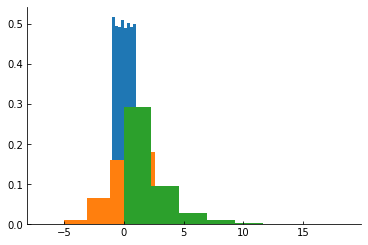

In [9]:
import matplotlib.pyplot as plt

for sample in samples:
    plt.hist(sample, bins = 8, density=True)

**Exercise 1**

Improve the rendition of the plot above using an array for the `bins` parameter.

**Exercise 2**

Explore the methods associated with the sample arrays to calculate their statistical properties, e.g. mean, standard deviation, variance etc.

**Exercise 3**

Select only positive entries from the array `uniform_array`.

##### Linear algebra

In [10]:
#  random 2d vectors

N = 4
d  = 2
r = rng.uniform(0,1,(N,d))

In [11]:
# norm of a vector
norms = np.linalg.norm(r, axis=1)

(-0.04779690613747465,
 1.0037350288869675,
 -0.04997599356762328,
 1.0494958649200887)

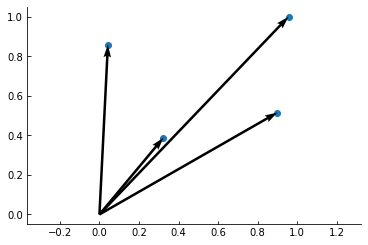

In [12]:
#plotting  the vectors
plt.scatter(r[:,0],r[:,1])
plt.quiver(np.zeros(N),np.zeros(N), r[:,0],r[:,1], scale=1, scale_units='xy',angles='xy')
plt.axis('equal')

In [27]:
# scalar product

r2 = np.dot(r[0], r[0])
print(r2)
print (norms[0]**2)

1.0752351739781325
1.0752351739781325


**Exercise 4**

Change the plot above to color the arrows according to their length.

**Exercise 5**

Consider the two vectors

$$\vec{u} = 3\hat{e}_x+6\hat{e}_y$$
$$\vec{v} = -2\hat{e}_x+1\hat{e}_y$$

Show numerically that they are orthogonal.

In [30]:
# matrix product
A = np.array([
    [1,1],
    [0,-1]
])

x = np.array([1,2])
np.matmul(A,x)

array([ 3, -2])

In [31]:
A@x

array([ 3, -2])

In [32]:
np.dot(A,x)

array([ 3, -2])

In [33]:
A*x

array([[ 1,  2],
       [ 0, -2]])

**Exercise 6**

Explain the difference between `A*x` and `A@x`. Use the documentation.